In [1]:
import pandas as pd
import dask as dd

### Extract car industry entries

In [19]:
df = pd.read_csv('../data.csv')


/var/folders/5h/tc1b2dhx483_cx6pj09_pyc80000gn/T/ipykernel_55119/1484362809.py:1: DtypeWarning: Columns (3,4,7,8,11,12,14,15,16,19,45,46,49,56,69,83,95,98,99,100,104,108,109,119,120,121,122,123,124,125,127,128,129,141,143,144,145,146,147,148,155,188,217,218,219,220,221,222,223,224,226,229,232,233,234,235,236,237,238,239,240,243,244,245,246,248,249,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data.csv')


In [38]:
df = df[df['psic'].notna()] #drop 45 NaN participant SIC, fix the issue by not solving it
autoDF = df[df['psic'].str.contains('3711')] #Create df who have at least one participant in the automotive industry with SIC: 3711
autoDF.to_csv('autodf.csv') #create csv sample

## Work on car industry DF

In [2]:
autoDF = pd.read_csv('autodf.csv')

### Clean data

In [3]:
autoDF = autoDF.drop('Unnamed: 0.1', axis=1)
autoDF.rename(columns={"Unnamed: 0": "og_index"},inplace=True)

count    3683.000000
mean        2.315775
std         0.831181
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        13.000000
Name: nump, dtype: float64


<AxesSubplot:>

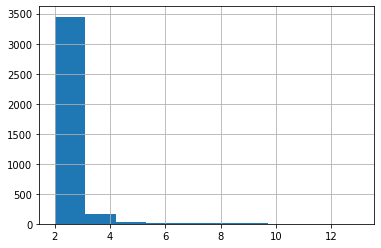

In [4]:
print(autoDF['nump'].describe())
autoDF['nump'].hist()

## H1: Auto industry incumbents tend to form alliances with new entrants introducing the EV technology rather than other incumbents

In [46]:
variables = ["id","activity", "activityc", "da", "jvinc", "jvindustry", "jvstatus", "p", "pbl", "pbuss", "psic", "psicp", "nump", "PBUSSOURCE".lower()]
honeDF = autoDF[variables]
honeDF = honeDF[honeDF['psicp'].str.contains('3711')] #Filter alliances where there is >= 1 participant with {Participant SIC Primary}(PSICP) == car industry

In [47]:
pattern = r'\\n' #Regex pattern to split name

for n in range(1, (int(honeDF["nump"].max()) + 1)): 
	honeDF['p' + str(n) + "name"] =  honeDF['p'].str.split(pattern, expand=True)[n-1] #Create seperate columns for each possible participant

	honeDF["p" + str(n) + "sicp"] = honeDF['psicp'].str.split(pattern, expand=True)[n-1] #Create seperate placeholder columns to split participant SIC codes


In [40]:
#Turn SICs to numeric

# cols = honeDF.filter(regex='p\d+sicp', axis=1).columns #individual primary sic codes columns

# honeDF[cols] = honeDF[cols].apply(pd.to_numeric, errors="coerce")

In [59]:
honeDF['da'] = pd.to_datetime(honeDF['da']) #turn Announcement Date to datetime